(normative)=
# Normative



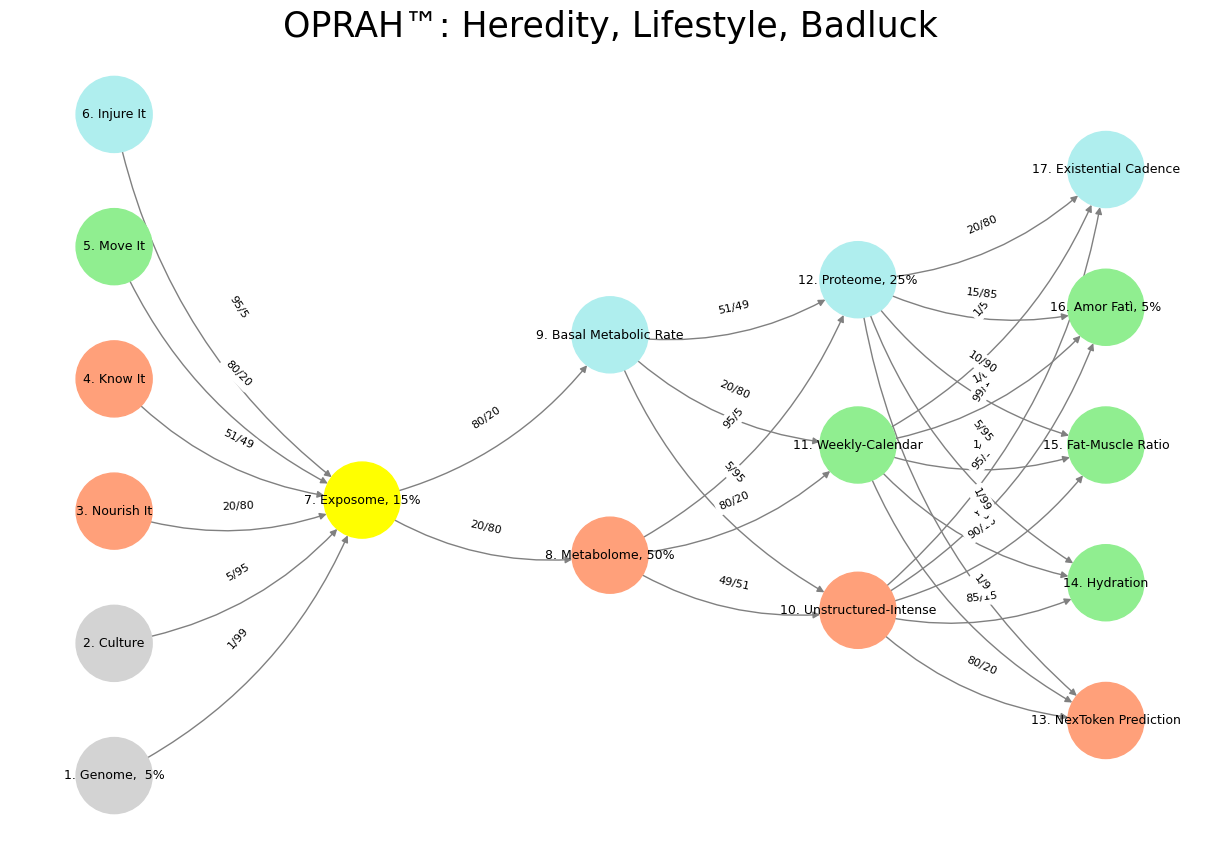

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the neural network layers
def define_layers():
    return {
        'Suis': ['Genome,  5%', 'Culture', 'Nourish It', 'Know It', "Move It", 'Injure It'],  # Static
        'Voir': ['Exposome, 15%'],  
        'Choisis': ['Metabolome, 50%', 'Basal Metabolic Rate'],  
        'Deviens': ['Unstructured-Intense', 'Weekly-Calendar', 'Proteome, 25%'],  
        "M'èléve": ['NexToken Prediction', 'Hydration', 'Fat-Muscle Ratio', 'Amor Fatì, 5%', 'Existential Cadence']  
    }

# Assign colors to nodes
def assign_colors():
    color_map = {
        'yellow': ['Exposome, 15%'],  
        'paleturquoise': ['Injure It', 'Basal Metabolic Rate', 'Proteome, 25%', 'Existential Cadence'],  
        'lightgreen': ["Move It", 'Weekly-Calendar', 'Hydration', 'Amor Fatì, 5%', 'Fat-Muscle Ratio'],  
        'lightsalmon': ['Nourish It', 'Know It', 'Metabolome, 50%', 'Unstructured-Intense', 'NexToken Prediction'],
    }
    return {node: color for color, nodes in color_map.items() for node in nodes}

# Define edge weights (hardcoded for editing)
def define_edges():
    return {
        ('Genome,  5%', 'Exposome, 15%'): '1/99',
        ('Culture', 'Exposome, 15%'): '5/95',
        ('Nourish It', 'Exposome, 15%'): '20/80',
        ('Know It', 'Exposome, 15%'): '51/49',
        ("Move It", 'Exposome, 15%'): '80/20',
        ('Injure It', 'Exposome, 15%'): '95/5',
        ('Exposome, 15%', 'Metabolome, 50%'): '20/80',
        ('Exposome, 15%', 'Basal Metabolic Rate'): '80/20',
        ('Metabolome, 50%', 'Unstructured-Intense'): '49/51',
        ('Metabolome, 50%', 'Weekly-Calendar'): '80/20',
        ('Metabolome, 50%', 'Proteome, 25%'): '95/5',
        ('Basal Metabolic Rate', 'Unstructured-Intense'): '5/95',
        ('Basal Metabolic Rate', 'Weekly-Calendar'): '20/80',
        ('Basal Metabolic Rate', 'Proteome, 25%'): '51/49',
        ('Unstructured-Intense', 'NexToken Prediction'): '80/20',
        ('Unstructured-Intense', 'Hydration'): '85/15',
        ('Unstructured-Intense', 'Fat-Muscle Ratio'): '90/10',
        ('Unstructured-Intense', 'Amor Fatì, 5%'): '95/5',
        ('Unstructured-Intense', 'Existential Cadence'): '99/1',
        ('Weekly-Calendar', 'NexToken Prediction'): '1/9',
        ('Weekly-Calendar', 'Hydration'): '1/8',
        ('Weekly-Calendar', 'Fat-Muscle Ratio'): '1/7',
        ('Weekly-Calendar', 'Amor Fatì, 5%'): '1/6',
        ('Weekly-Calendar', 'Existential Cadence'): '1/5',
        ('Proteome, 25%', 'NexToken Prediction'): '1/99',
        ('Proteome, 25%', 'Hydration'): '5/95',
        ('Proteome, 25%', 'Fat-Muscle Ratio'): '10/90',
        ('Proteome, 25%', 'Amor Fatì, 5%'): '15/85',
        ('Proteome, 25%', 'Existential Cadence'): '20/80'
    }

# Calculate positions for nodes
def calculate_positions(layer, x_offset):
    y_positions = np.linspace(-len(layer) / 2, len(layer) / 2, len(layer))
    return [(x_offset, y) for y in y_positions]

# Create and visualize the neural network graph
def visualize_nn():
    layers = define_layers()
    colors = assign_colors()
    edges = define_edges()
    G = nx.DiGraph()
    pos = {}
    node_colors = []
    
    # Create mapping from original node names to numbered labels
    mapping = {}
    counter = 1
    for layer in layers.values():
        for node in layer:
            mapping[node] = f"{counter}. {node}"
            counter += 1
            
    # Add nodes with new numbered labels and assign positions
    for i, (layer_name, nodes) in enumerate(layers.items()):
        positions = calculate_positions(nodes, x_offset=i * 2)
        for node, position in zip(nodes, positions):
            new_node = mapping[node]
            G.add_node(new_node, layer=layer_name)
            pos[new_node] = position
            node_colors.append(colors.get(node, 'lightgray'))
    
    # Add edges with updated node labels
    for (source, target), weight in edges.items():
        if source in mapping and target in mapping:
            new_source = mapping[source]
            new_target = mapping[target]
            G.add_edge(new_source, new_target, weight=weight)
    
    # Draw the graph
    plt.figure(figsize=(12, 8))
    edges_labels = {(u, v): d["weight"] for u, v, d in G.edges(data=True)}
    
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color='gray',
        node_size=3000, font_size=9, connectionstyle="arc3,rad=0.2"
    )
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edges_labels, font_size=8)
    plt.title("OPRAH™: Heredity, Lifestyle, Badluck", fontsize=25)
    plt.show()

# Run the visualization
visualize_nn()

```{figure} ../../figures/blanche.*
---
width: 1
height: 1
---
Space is Apollonian and Time Dionysian. They are the static representation and the dynamic emergent. Ain't that somethin?
```




#